In [7]:
import csv

with open('csvs/fish.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
data = data[]

In [8]:
name = data[0][0]
encoded = data[0][1]
print(name)
print(encoded)

0011165.jpg
1


In [9]:
print(data)

[['0011165.jpg', '1'], ['002be4f.jpg', '1'], ['0031ae9.jpg', '1'], ['0035239.jpg', '0'], ['003994e.jpg', '1'], ['00498ec.jpg', '0'], ['006bf7c.jpg', '1'], ['006c5a6.jpg', '1'], ['008233e.jpg', '0'], ['008a5ff.jpg', '1'], ['0091591.jpg', '0'], ['0095357.jpg', '0'], ['009e2f3.jpg', '1'], ['00a0954.jpg', '0'], ['00b81e1.jpg', '0'], ['00bea06.jpg', '1'], ['00cedfa.jpg', '0'], ['00d4443.jpg', '0'], ['00dec6a.jpg', '1'], ['0100a84.jpg', '1'], ['0104b5b.jpg', '0'], ['0107838.jpg', '1'], ['0118bff.jpg', '0'], ['011ba04.jpg', '1'], ['01242d7.jpg', '1'], ['014310a.jpg', '1'], ['0146ef3.jpg', '1'], ['0153a8b.jpg', '1'], ['015aa06.jpg', '1'], ['015b764.jpg', '1'], ['016c135.jpg', '1'], ['017ded1.jpg', '1'], ['0187cd7.jpg', '0'], ['01a7865.jpg', '0'], ['01c6ec3.jpg', '0'], ['01eecc1.jpg', '1'], ['0208ccf.jpg', '0'], ['021bb26.jpg', '1'], ['0225687.jpg', '1'], ['022a275.jpg', '0'], ['022d78c.jpg', '0'], ['022fd47.jpg', '0'], ['023accd.jpg', '1'], ['025ad96.jpg', '0'], ['02601cd.jpg', '0'], ['0269e9a

In [34]:
import os
import shutil

source = 'train_images/'
test_dest = 'fish_class/fish_test/'
validation_dest = 'fish_class/fish_validation/'

for i in range(0,300):
    name = data[i][0]
    isFish = data[i][1]
    if os.path.exists(source + name):
        if isFish == '0':
            shutil.copyfile(source + name, test_dest + 'no/' + name)
        else:
            shutil.copyfile(source + name, test_dest + 'yes/' + name)
for i in range(300, 475):
    name = data[i][0]
    isFish = data[i][1]
    if os.path.exists(source + name):
        if isFish == '0':
            shutil.copyfile(source + name, validation_dest + 'no/' + name)
        else:
            shutil.copyfile(source + name, validation_dest + 'yes/' + name)

In [35]:
# Load some neural network functions we'll be using.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = Input(shape=(150, 150, 3))

# First convolution extracts 4 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

convLayer1 = Conv2D(4, (3,3))(img_input)
poolLayer2 = MaxPooling2D((2,2))(convLayer1)

# Second convolution extracts 5 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

convLayer3 = Conv2D(5, (3,3))(poolLayer2)
poolLayer4 = MaxPooling2D((2,2))(convLayer3)

# Third convolution extracts 10 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

convLayer5 = Conv2D(10, (3,3))(poolLayer4)
poolLayer6 = MaxPooling2D((2,2))(convLayer5)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers

flattenLayer7 = Flatten()(poolLayer6)

# Create a fully connected (dense) layer with ReLU activation and 20 hidden units

denseLayer8 = Dense(20, activation='relu')(flattenLayer7)

# Create output layer with a single node and sigmoid activation

output = Dense(1, activation='sigmoid')(denseLayer8)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [36]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['acc'])

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        test_dest,  # This is the source directory for training images
        target_size = (150, 150),  # All images will be resized to 150x150
        batch_size = 10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode = 'binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dest,
        target_size = (150, 150),
        batch_size = 10,
        class_mode = 'binary')

Found 300 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 30,  # 2000 images = batch_size * steps
      epochs = 15,
      validation_data = validation_generator,
      validation_steps = 20,  # 1000 images = batch_size * steps
      verbose = 2)

Epoch 1/15
30/30 - 21s - loss: 0.7558 - acc: 0.4967 - val_loss: 0.6865 - val_acc: 0.5650
Epoch 2/15
30/30 - 19s - loss: 0.6599 - acc: 0.6000 - val_loss: 0.6840 - val_acc: 0.5800
Epoch 3/15
30/30 - 19s - loss: 0.5991 - acc: 0.7133 - val_loss: 0.6933 - val_acc: 0.5800
Epoch 4/15
30/30 - 19s - loss: 0.4957 - acc: 0.7967 - val_loss: 0.7386 - val_acc: 0.5550
Epoch 5/15
30/30 - 17s - loss: 0.3635 - acc: 0.8967 - val_loss: 0.9776 - val_acc: 0.5600
Epoch 6/15
30/30 - 17s - loss: 0.2673 - acc: 0.9100 - val_loss: 0.8715 - val_acc: 0.5550
Epoch 7/15
30/30 - 21s - loss: 0.1717 - acc: 0.9633 - val_loss: 1.0391 - val_acc: 0.5350
Epoch 8/15
30/30 - 20s - loss: 0.0833 - acc: 0.9933 - val_loss: 1.3507 - val_acc: 0.5400
Epoch 9/15
30/30 - 21s - loss: 0.0347 - acc: 0.9967 - val_loss: 1.4872 - val_acc: 0.5500
Epoch 10/15
30/30 - 22s - loss: 0.0163 - acc: 1.0000 - val_loss: 1.8800 - val_acc: 0.5600
Epoch 11/15
30/30 - 20s - loss: 0.0111 - acc: 1.0000 - val_loss: 1.9553 - val_acc: 0.5800
Epoch 12/15
30/30 -

Text(0.5, 1.0, 'Training and validation loss')

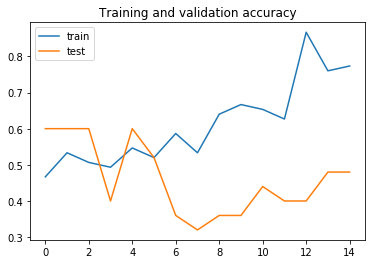

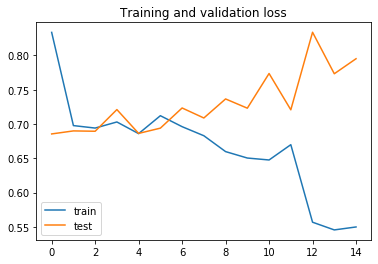

In [33]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['train', 'test'], loc='lower left')
plt.title('Training and validation loss')